In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors

from sklearn.model_selection import train_test_split, validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import cross_val_score, train_test_split, validation_curve, GridSearchCV, KFold, ShuffleSplit, StratifiedShuffleSplit
from sklearn.metrics import classification_report, roc_auc_score, f1_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# pip install imbalanced-learn

### Область работы 2 (поиск лучшей модели)

In [3]:
path_train = 'income_train.csv'
data = pd.read_csv(path_train)

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,31,Private,180551,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
1,44,Private,191814,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,>50K
2,38,Private,79619,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,42,United-States,>50K
3,19,Private,320014,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,25,United-States,<=50K
4,51,Private,169364,Some-college,10,Divorced,Handlers-cleaners,Not-in-family,White,Female,0,0,40,Ireland,<=50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22792 entries, 0 to 22791
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             22792 non-null  int64 
 1   workclass       22792 non-null  object
 2   fnlwgt          22792 non-null  int64 
 3   education       22792 non-null  object
 4   education-num   22792 non-null  int64 
 5   marital-status  22792 non-null  object
 6   occupation      22792 non-null  object
 7   relationship    22792 non-null  object
 8   race            22792 non-null  object
 9   sex             22792 non-null  object
 10  capital-gain    22792 non-null  int64 
 11  capital-loss    22792 non-null  int64 
 12  hours-per-week  22792 non-null  int64 
 13  native-country  22792 non-null  object
 14  income          22792 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


In [6]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,22792.000000,2.279200e+04,22792.000000,22792.000000,22792.000000,22792.000000
mean,38.526895,1.892359e+05,10.096437,1083.905186,87.289049,40.429405
std,13.563255,1.063693e+05,2.569110,7383.030104,402.312431,12.322072
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.172680e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.777275e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.361955e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:xlabel='income', ylabel='count'>

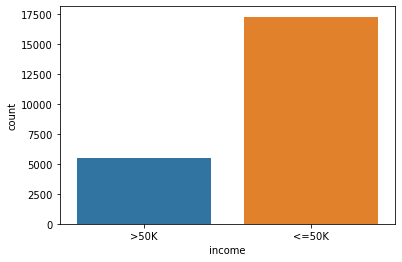

In [7]:
sns.countplot(data=data,x='income')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Private'),
  Text(1, 0, 'Local-gov'),
  Text(2, 0, 'Self-emp-not-inc'),
  Text(3, 0, '?'),
  Text(4, 0, 'Federal-gov'),
  Text(5, 0, 'Self-emp-inc'),
  Text(6, 0, 'State-gov'),
  Text(7, 0, 'Without-pay'),
  Text(8, 0, 'Never-worked')])

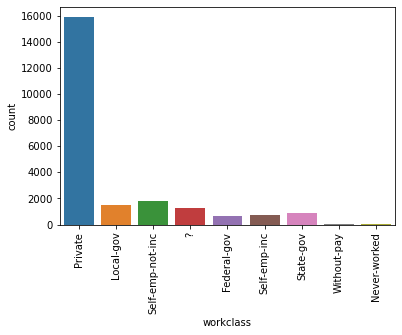

In [8]:
sns.countplot(data=data,x='workclass')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'HS-grad'),
  Text(1, 0, 'Some-college'),
  Text(2, 0, 'Bachelors'),
  Text(3, 0, 'Masters'),
  Text(4, 0, '10th'),
  Text(5, 0, '11th'),
  Text(6, 0, '7th-8th'),
  Text(7, 0, 'Assoc-acdm'),
  Text(8, 0, 'Assoc-voc'),
  Text(9, 0, 'Doctorate'),
  Text(10, 0, 'Prof-school'),
  Text(11, 0, 'Preschool'),
  Text(12, 0, '9th'),
  Text(13, 0, '12th'),
  Text(14, 0, '5th-6th'),
  Text(15, 0, '1st-4th')])

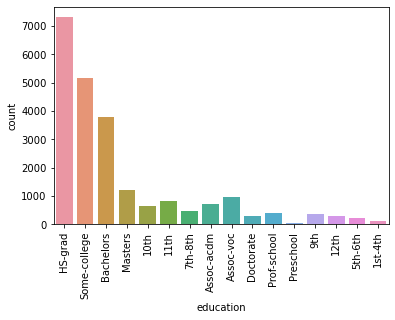

In [9]:
sns.countplot(data=data,x='education')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Married-civ-spouse'),
  Text(1, 0, 'Never-married'),
  Text(2, 0, 'Divorced'),
  Text(3, 0, 'Widowed'),
  Text(4, 0, 'Separated'),
  Text(5, 0, 'Married-spouse-absent'),
  Text(6, 0, 'Married-AF-spouse')])

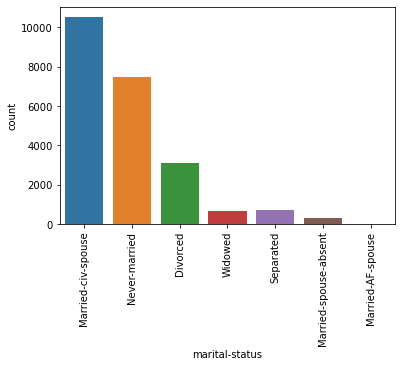

In [10]:
sns.countplot(data=data,x='marital-status')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'United-States'),
  Text(1, 0, 'Ireland'),
  Text(2, 0, 'El-Salvador'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Hong'),
  Text(5, 0, 'Dominican-Republic'),
  Text(6, 0, 'England'),
  Text(7, 0, 'Ecuador'),
  Text(8, 0, '?'),
  Text(9, 0, 'Poland'),
  Text(10, 0, 'Taiwan'),
  Text(11, 0, 'Philippines'),
  Text(12, 0, 'Peru'),
  Text(13, 0, 'Puerto-Rico'),
  Text(14, 0, 'South'),
  Text(15, 0, 'Columbia'),
  Text(16, 0, 'Mexico'),
  Text(17, 0, 'India'),
  Text(18, 0, 'Vietnam'),
  Text(19, 0, 'Germany'),
  Text(20, 0, 'Haiti'),
  Text(21, 0, 'Cuba'),
  Text(22, 0, 'Italy'),
  Text(23, 0, 'Jamaica'),
  Text(24, 0, 'Portugal'),
  Text(25, 0, 'Thailand'),
  Text(26, 0, 'China'),
  Text(27, 0, 'Japan'),
  Text(28, 0, 'Yugoslavia'),
  Text(29, 0, 'Iran'),
  Text(30, 0, 'Greece'),
  Text(31,

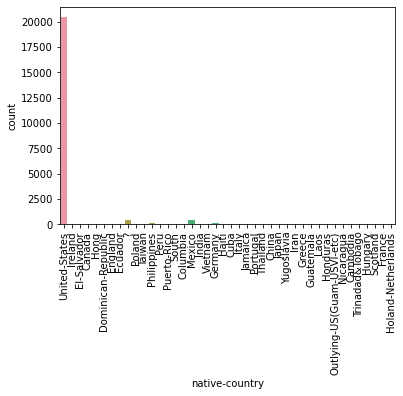

In [11]:
sns.countplot(data=data,x='native-country')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Adm-clerical'),
  Text(1, 0, 'Prof-specialty'),
  Text(2, 0, 'Sales'),
  Text(3, 0, 'Other-service'),
  Text(4, 0, 'Handlers-cleaners'),
  Text(5, 0, 'Exec-managerial'),
  Text(6, 0, 'Craft-repair'),
  Text(7, 0, 'Transport-moving'),
  Text(8, 0, 'Machine-op-inspct'),
  Text(9, 0, '?'),
  Text(10, 0, 'Priv-house-serv'),
  Text(11, 0, 'Farming-fishing'),
  Text(12, 0, 'Protective-serv'),
  Text(13, 0, 'Tech-support'),
  Text(14, 0, 'Armed-Forces')])

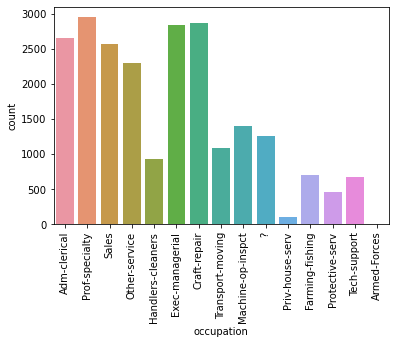

In [12]:
sns.countplot(data=data,x='occupation')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Wife'),
  Text(1, 0, 'Husband'),
  Text(2, 0, 'Own-child'),
  Text(3, 0, 'Not-in-family'),
  Text(4, 0, 'Unmarried'),
  Text(5, 0, 'Other-relative')])

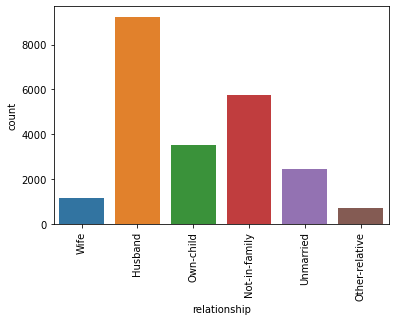

In [13]:
sns.countplot(data=data,x='relationship')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Asian-Pac-Islander'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Amer-Indian-Eskimo')])

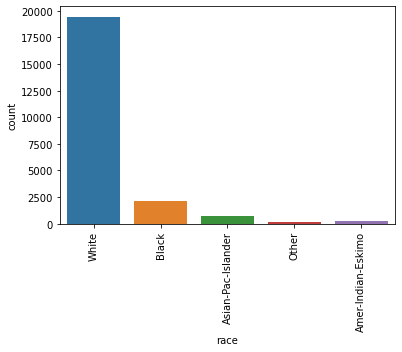

In [14]:
sns.countplot(data=data,x='race')
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

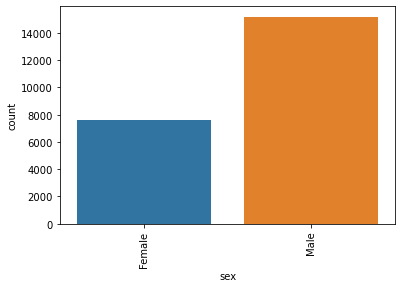

In [15]:
sns.countplot(data=data,x='sex')
plt.xticks(rotation=90)

In [16]:
data = data.replace('?', np.nan)
def about_data(df):
    total_missing_values = df.isnull().sum().reset_index()
    total_missing_values = total_missing_values.rename(columns={'index':'columns',0:'total missing'})
    total_missing_values['ration of missing'] = total_missing_values['total missing']/len(df)
    return total_missing_values

In [17]:
data.shape

(22792, 15)

In [18]:
about_data(data)

,columns,total missing,ration of missing
0,age,0,0.000000
1,workclass,1250,0.054844
2,fnlwgt,0,0.000000
3,education,0,0.000000
4,education-num,0,0.000000
5,marital-status,0,0.000000
6,occupation,1255,0.055063
7,relationship,0,0.000000
8,race,0,0.000000
9,sex,0,0.000000


In [19]:
data.dropna(inplace=True,axis=0)
about_data(data)

,columns,total missing,ration of missing
0,age,0,0.0
1,workclass,0,0.0
2,fnlwgt,0,0.0
3,education,0,0.0
4,education-num,0,0.0
5,marital-status,0,0.0
6,occupation,0,0.0
7,relationship,0,0.0
8,race,0,0.0
9,sex,0,0.0


In [20]:
data.shape

(21151, 15)

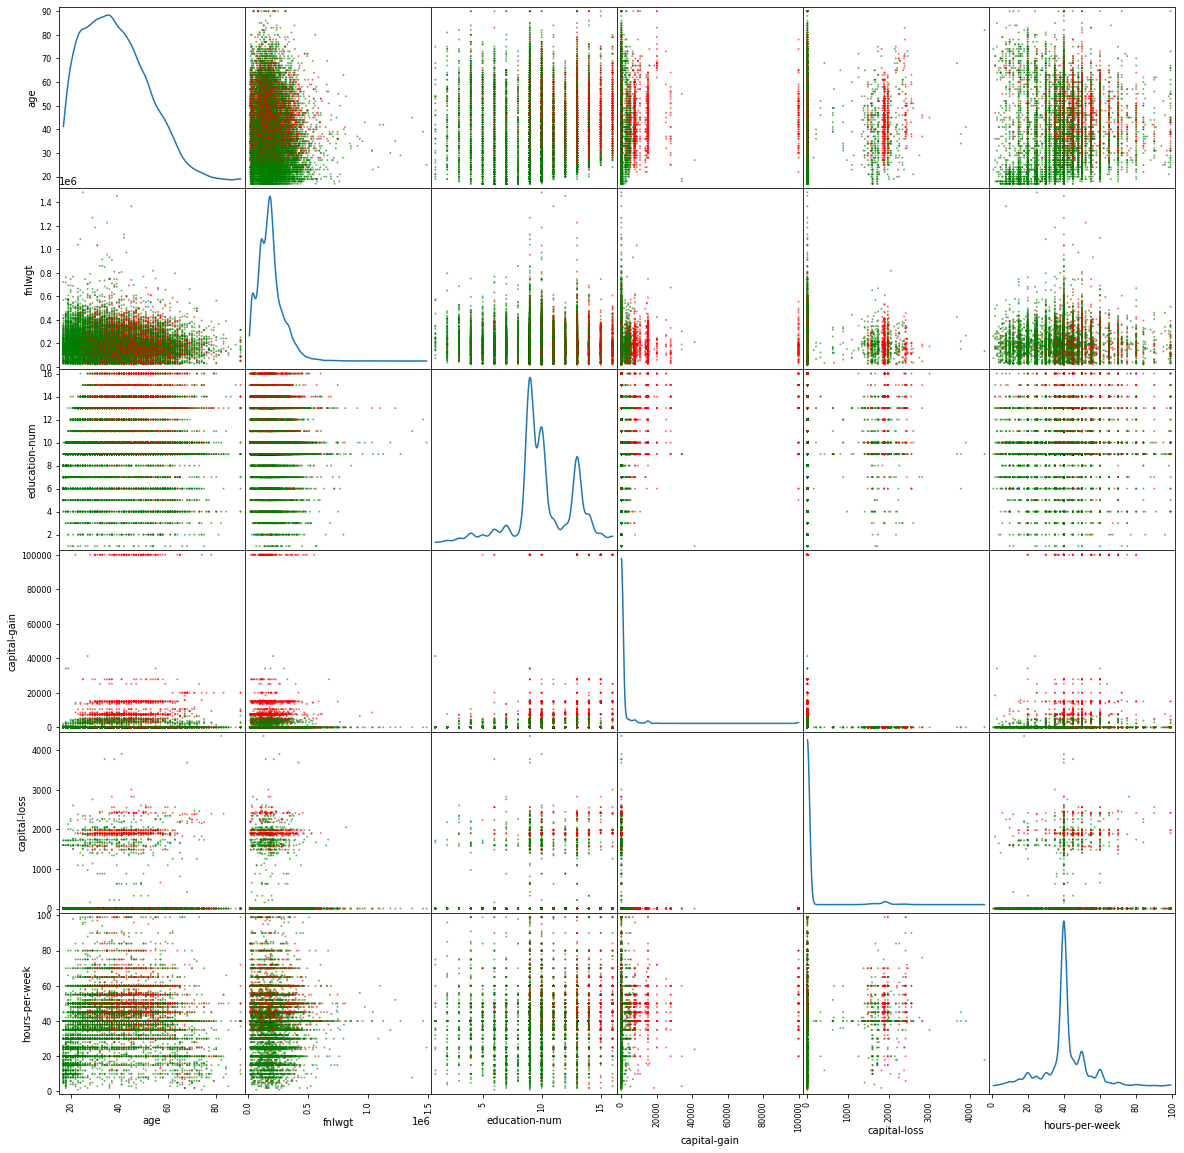

In [21]:
pd_plt.scatter_matrix(data,
                     c=pd.factorize(data['income'])[0],
                     alpha = 0.6,
                     s=15,
                     figsize=(20,20),
                     diagonal='kde',
                     cmap = plt_colors.ListedColormap(['red','green']))
plt.show()

<AxesSubplot:>

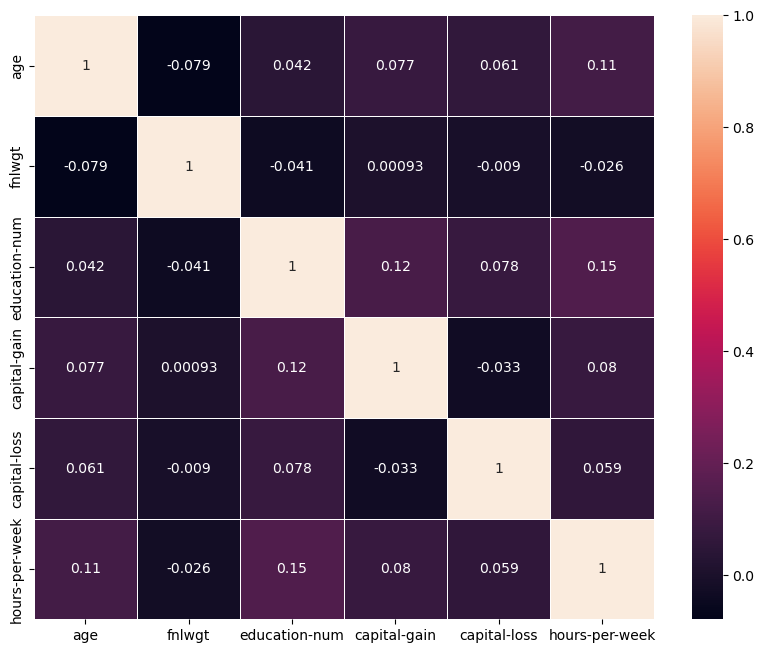

In [22]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(data.corr(),annot=True,linewidth=0.5)

In [23]:
cat_features = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex','native-country']
data = pd.get_dummies(data, columns = cat_features)

In [24]:
data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,31,180551,9,0,0,40,>50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,44,191814,10,0,0,45,>50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,79619,13,0,0,42,>50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,19,320014,10,0,0,25,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,51,169364,10,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
X = data.drop("income",axis=1)
y = data["income"]

In [26]:
ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
list = [('LR', LogisticRegression()),
             ('KNN', KNeighborsClassifier()),
             ('DTC', DecisionTreeClassifier()),
             ('RFC', RandomForestClassifier(n_estimators=100,max_features=3)),
            ('SVC', SVC()),
            ('GB', GradientBoostingClassifier())]

In [ ]:

results = []
names_of_models = []


for name, model in list:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names_of_models.append(name)
    res = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(res)

/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/Users/revopart/opt/anaconda3/lib/python

/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/revopart/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1136, in f1_score
    return fbeta_score(
  File "/Users/revopart/opt/anaconda3/lib/python

LR: nan (nan)


NameError: name 'get_scorer_names' is not defined

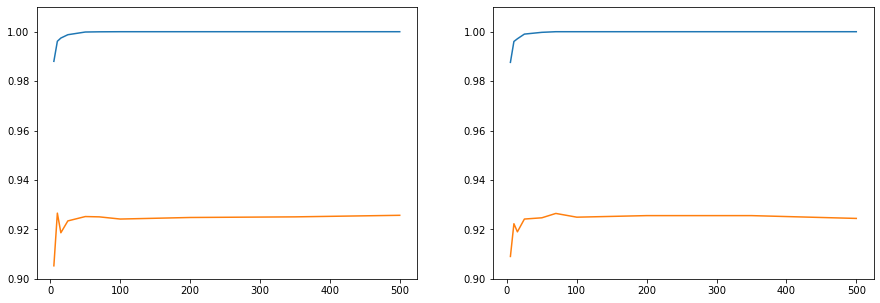

In [51]:
sc_train1 =[]
sc_test1 = []
sc_train2 =[]
sc_test2 = []
n_estimators = [ 5, 10, 15, 25, 50, 70, 100, 200, 350, 500]
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators= n, n_jobs = -1)
    rf.fit(X_train_scaled, y_train)
    sc_train_n = rf.score(X_train_scaled, y_train)
    sc_test_n = rf.score(X_test_scaled, y_test)
    sc_train1.append(sc_train_n)
    sc_test1.append(sc_test_n)

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators= n, n_jobs = -1, criterion= 'entropy')
    rf.fit(X_train, y_train)
    sc_train_n = rf.score(X_train, y_train)
    sc_test_n = rf.score(X_test, y_test)
    sc_train2.append(sc_train_n)
    sc_test2.append(sc_test_n)    
    
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(n_estimators,sc_train1)
ax1.plot(n_estimators,sc_test1)
ax1.set_ylim(0.9, 1.01)
ax2.plot(n_estimators,sc_train2)
ax2.plot(n_estimators,sc_test2)
ax2.set_ylim(0.9, 1.01);

In [49]:
parameters= {
"n_estimators"    : [5, 10, 15, 25,50,100,150,200, 250] ,
 "max_features"        : [1,2,3,4,5],
}
model = RandomForestClassifier()

kfold = KFold(n_splits=10)
grid_cv = GridSearchCV(estimator=model, param_grid=parameters scoring='accuracy', cv=kfold)
result = grid_cv.fit(X_train_scaled, y_train)

print("Best: {} using {}".format(result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{}  {} with: {}" .format(mean, stdev, param))

Best: 0.9139230249544745 using {'max_features': 5, 'n_estimators': 150}
0.8927299460410355  0.00821987034192512 with: {'max_features': 1, 'n_estimators': 5}
0.9063536919449726  0.006150726811321089 with: {'max_features': 1, 'n_estimators': 10}
0.9054709857878244  0.007644899357067803 with: {'max_features': 1, 'n_estimators': 15}
0.9094657627665116  0.007569005184331916 with: {'max_features': 1, 'n_estimators': 25}
0.9103066642485358  0.008841825696165396 with: {'max_features': 1, 'n_estimators': 50}
0.9116943673458998  0.007375747930993534 with: {'max_features': 1, 'n_estimators': 100}
0.9102645413982948  0.007288420753129081 with: {'max_features': 1, 'n_estimators': 150}
0.9115261941200531  0.006848741909715832 with: {'max_features': 1, 'n_estimators': 200}
0.9108112723080529  0.006067233039047558 with: {'max_features': 1, 'n_estimators': 250}
0.8936546336372613  0.005611181010130463 with: {'max_features': 2, 'n_estimators': 5}
0.9093397300673012  0.0069003662335230505 with: {'max_fea

In [53]:
best_forest = RandomForestClassifier(n_estimators=150, max_features=5)
best_forest.fit(X_train_scaled, y_train)
pred = best_forest.predict(X_test_scaled)

In [72]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n       <=50K       0.97      0.87      0.92      3963\n        >50K       0.88      0.98      0.93      3964\n\n    accuracy                           0.92      7927\n   macro avg       0.93      0.92      0.92      7927\nweighted avg       0.93      0.92      0.92      7927\n'

array(['>50K', '>50K', '<=50K', ..., '>50K', '>50K', '>50K'], dtype=object)

### Область работы 3 (выполнение лучшей модели)

In [4]:
# Данный блок(и) в области 3 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [6]:

path_train = 'income_train.csv'
path_test  = 'income_test.csv'

In [7]:
# Блок(и) обучения и поверки модели

In [8]:
data_train = pd.read_csv(path_train)
data_test = pd.read_csv(path_test)

(9769, 14)

In [9]:
data_train = data_train.replace('?', np.nan)
data_test = data_test.replace('?', np.nan)
data_train.dropna(inplace=True,axis=0)
data_test.dropna(inplace=True,axis=0)

(9011, 14)

In [10]:
X_train = data_train.drop("income",axis=1)
y_train = data_train["income"]
X_test = data_test

In [11]:
cat_features = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex','native-country']
X_train = pd.get_dummies(X_train, columns = cat_features).drop(columns='native-country_Holand-Netherlands', axis=1)
X_test = pd.get_dummies(X_test, columns = cat_features)

In [12]:
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

In [13]:
# Блок предсказания с использованием тестового набора

In [14]:
final = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=150, max_features=5))
final.fit(X_train, y_train)
pred = final.predict(X_test)

In [15]:
# Маска отобраных номеров строк для предсказания из тестового набора
mask = X_test.index
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = pred

Int64Index([   0,    1,    2,    3,    4,    6,    7,    8,    9,   10,
            ...
            9758, 9759, 9760, 9761, 9763, 9764, 9765, 9766, 9767, 9768],
           dtype='int64', length=9011)